In [27]:

import kagglehub
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [28]:
# Загрузка датасета
dataset_path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

In [29]:
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

In [30]:
# 🔹 3. Определяем преобразования
transform = transforms.Compose([
    transforms.Resize((256, 256)),  
    transforms.ToTensor(),          
])

In [31]:
train_dataset = ImageFolder(root=train_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)

In [32]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Обучающих примеров:", len(train_dataset))
print("Тестовых примеров:", len(test_dataset))

Обучающих примеров: 5712
Тестовых примеров: 1311


In [33]:
print("Словарь классов:", train_dataset.class_to_idx)

Словарь классов: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


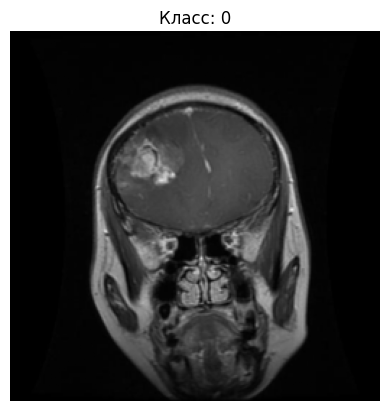

In [ ]:
import matplotlib.pyplot as plt

def show_image(tensor, label):
    img = tensor.permute(1, 2, 0)  #
    plt.imshow(img)
    plt.title(f"Класс: {label}")
    plt.axis("off")
    plt.show()

image, label = train_dataset[0]
show_image(image, label)